In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
this_path = os.getcwd()
base_path = this_path.split('scripts')[0]
res_path = base_path+'stat_results/'
CLb_noring_file = res_path + 'CLb_heatmap_noring.npy'
CLb_noringvsring_file = res_path + 'CLb_heatmap_noringvsring.npy'

(10, 20, 80)


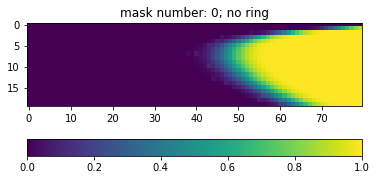

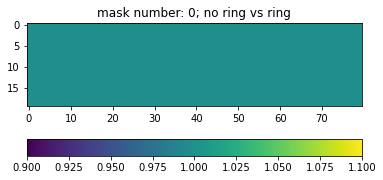

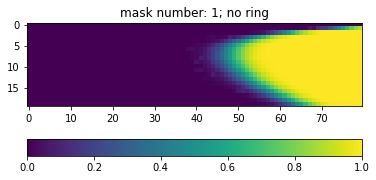

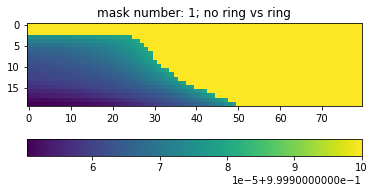

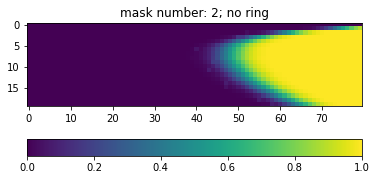

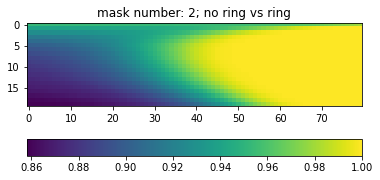

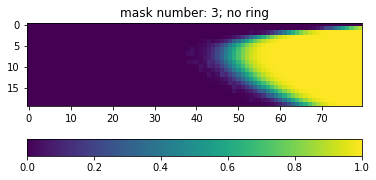

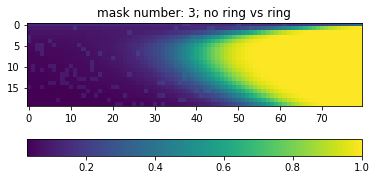

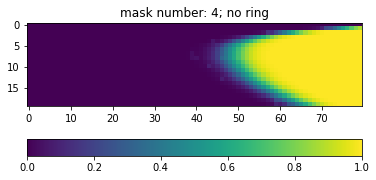

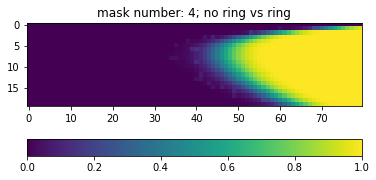

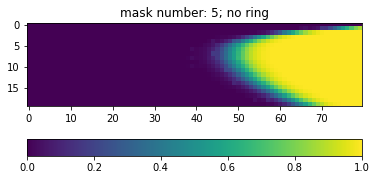

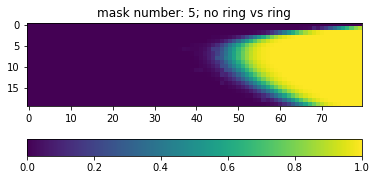

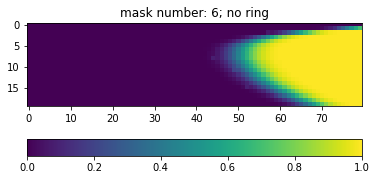

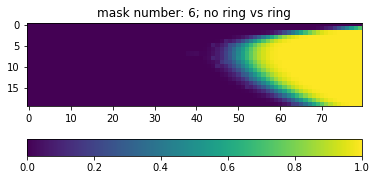

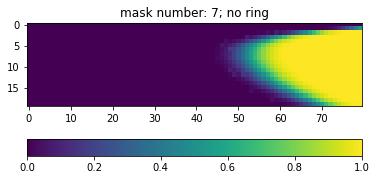

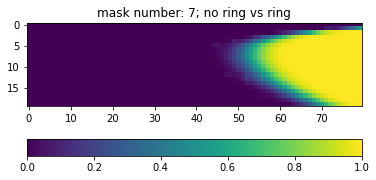

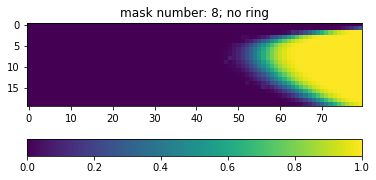

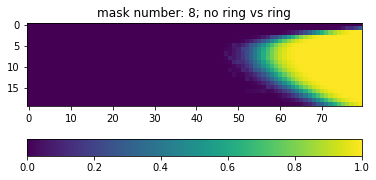

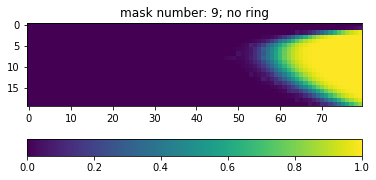

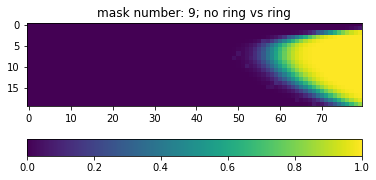

In [10]:
CLb_noring = np.load(CLb_noring_file)
CLb_noringvsring = np.load(CLb_noringvsring_file)
sh = CLb_noring.shape
print(sh)
num_masks = sh[0]
for i in range(num_masks):
    fig = plt.figure()
    plt.imshow(CLb_noring[i])
    plt.title('mask number: ' + str(i) + '; no ring')
    plt.colorbar(orientation = 'horizontal')
    fig = plt.figure()
    plt.imshow(CLb_noringvsring[i])
    plt.title('mask number: ' + str(i) + '; no ring vs ring')
    plt.colorbar(orientation = 'horizontal')

In [24]:
alpha = 0.05
N = 50000
ind_NR = np.where(np.logical_not(CLb_noringvsring==0))
ind_NN = np.where(np.logical_not(CLb_noring==0))
min_NR = np.min(CLb_noringvsring[ind_NR])
min_NN = np.min(CLb_noring[ind_NN])
min_either = min(min_NR, min_NN)

In [25]:
ind_NR = np.where(CLb_noringvsring==0)
ind_NN = np.where(CLb_noring==0)
CLb_NR_new = CLb_noringvsring
CLb_NN_new = CLb_noring
CLb_NR_new[ind_NR] = min_either*0.01
CLb_NN_new[ind_NN] = min_either*0.01
diff_elementwise = CLb_NR_new - CLb_NN_new
sigma_CLb = np.sqrt(CLb_NN_new/(alpha*N))
lam_grid_sq = diff_elementwise**2/sigma_CLb**2
lam_tot_sq = np.sum(lam_grid_sq, axis=(1,2))
print(lam_tot_sq)

[2.28894068e+12 2.25483659e+12 1.93227575e+12 7.29140300e+10
 2.24962147e+08 5.66622618e+06 3.97365534e+06 5.15958973e+06
 6.42150917e+06 2.48480175e+03]


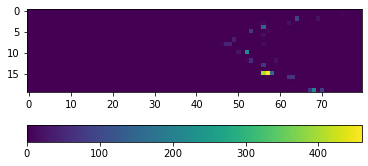

In [34]:
plt.imshow(lam_grid_sq[9])
plt.colorbar(orientation='horizontal')